<a href="https://colab.research.google.com/github/kokorina-irina/ML/blob/master/RK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Кокорина Ирина ИУ5-63Б РК2**

**Задача №1**

Анализ текстов с использованием Байесовских методов

In [0]:
import numpy as np
import pandas as pd
from typing import Dict,  Tuple
from scipy import stats
from IPython.display import Image
from sklearn.datasets import load_iris,  load_boston
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor,  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV
from sklearn.metrics import accuracy_score,  balanced_accuracy_score
from sklearn.metrics import precision_score,  recall_score,  f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,  mean_squared_error,  mean_squared_log_error,  median_absolute_error,  r2_score 
from sklearn.metrics import roc_curve,  roc_auc_score
from sklearn.svm import SVC,  NuSVC,  LinearSVC,  OneClassSVM,  SVR,  NuSVR,  LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline 
sns.set(style= "ticks")

Загрузка данных 

In [6]:
amazon_df = pd.read_csv("amazon_cells_labelled.txt",  delimiter= '\t',  header= None,  names= ['text',  'value']) 
amazon_df.head()

,text,value
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [14]:
amazon_df.shape

(1000, 2)

In [15]:
# Сформируем общий словарь для обучения моделей из обучающей и тестовой выборки
vocab_list = amazon_df['text'].tolist()
vocab_list[1:10]

['Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.']

In [16]:
vocabVect = CountVectorizer()
vocabVect.fit(vocab_list)
corpusVocab = vocabVect.vocabulary_
print('Количество сформированных признаков - {}'.format(len(corpusVocab)))

Количество сформированных признаков - 1847


In [17]:
for i in list(corpusVocab)[1:10]:
    print('{}={}'.format(i, corpusVocab[i]))

there=1609
is=854
no=1074
way=1766
for=653
me=993
to=1640
plug=1212
it=857


In [0]:

X_train, X_test, y_train, y_test = train_test_split(amazon_df['text'], amazon_df['value'], test_size=0.5, random_state=1)

In [0]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [0]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v), 
         ("classifier", c)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_accuracy_score_for_classes(y_test, y_pred)

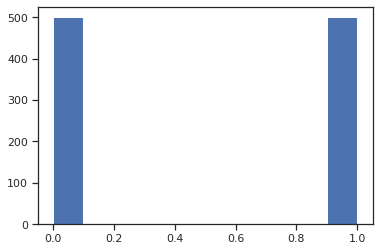

In [11]:
# В целевом признаке распределение классов относительно равномерное
plt.hist(amazon_df['value'])
plt.show()

In [12]:
# Классификация с использованием логистической регресии
sentiment(TfidfVectorizer(), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.8081632653061225
1 	 0.7529411764705882


In [18]:
sentiment(CountVectorizer(), MultinomialNB())

Метка 	 Accuracy
0 	 0.7836734693877551
1 	 0.8352941176470589


In [19]:
sentiment(TfidfVectorizer(), MultinomialNB())

Метка 	 Accuracy
0 	 0.8
1 	 0.8117647058823529


In [20]:
sentiment(CountVectorizer(), ComplementNB())

Метка 	 Accuracy
0 	 0.7795918367346939
1 	 0.8392156862745098


In [21]:
sentiment(TfidfVectorizer(), ComplementNB())


Метка 	 Accuracy
0 	 0.7714285714285715
1 	 0.8274509803921568


In [22]:
sentiment(CountVectorizer(binary=True), BernoulliNB())


Метка 	 Accuracy
0 	 0.7510204081632653
1 	 0.8352941176470589


# Векторизация текста 

In [0]:
test_features = vocabVect.transform(vocab_list)

In [24]:
test_features

<1000x1847 sparse matrix of type '<class 'numpy.int64'>'
	with 9130 stored elements in Compressed Sparse Row format>

In [25]:
test_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# Размер нулевой строки
len(test_features.todense()[0].getA1())

1847

In [27]:
# Непустые значения нулевой строки
[i for i in test_features.todense()[0].getA1() if i>0]

[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [28]:

vocabVect.get_feature_names()[100:120]

['anyone',
 'anything',
 'anyway',
 'anywhere',
 'apart',
 'apartment',
 'apparently',
 'appealing',
 'appearance',
 'appears',
 'applifies',
 'appointments',
 'are',
 'area',
 'arguing',
 'armband',
 'around',
 'arrival',
 'arrived',
 'as']

# N-граммы

In [29]:

ncv = CountVectorizer(ngram_range=(1,3))
ngram_features = ncv.fit_transform(vocab_list)
ngram_features

<1000x15088 sparse matrix of type '<class 'numpy.int64'>'
	with 25421 stored elements in Compressed Sparse Row format>

In [30]:
len(ncv.get_feature_names())

15088

In [31]:
# Теперь признаками являются N-граммы
ncv.get_feature_names()[1000:1020]

['any damage',
 'any from',
 'any from that',
 'any helpful',
 'any helpful support',
 'any kind',
 'any kind of',
 'any large',
 'any large problems',
 'any longer',
 'any longer on',
 'any mini',
 'any mini usb',
 'any of',
 'any of the',
 'any one',
 'any one regarding',
 'any one who',
 'any other',
 'any other speaker']

# TfidVectorizer

In [32]:

tfidfv = TfidfVectorizer(ngram_range=(1,3))
tfidf_ngram_features = tfidfv.fit_transform(vocab_list)
tfidf_ngram_features

<1000x15088 sparse matrix of type '<class 'numpy.float64'>'
	with 25421 stored elements in Compressed Sparse Row format>

In [33]:
tfidf_ngram_features.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
# Размер нулевой строки
len(tfidf_ngram_features.todense()[0].getA1())

15088

In [35]:
# Непустые значения нулевой строки
[i for i in tfidf_ngram_features.todense()[0].getA1() if i>0]

[0.12296719867492838,
 0.15534944608172185,
 0.15534944608172185,
 0.06830400100424172,
 0.1255030252282181,
 0.15534944608172185,
 0.1283779082640305,
 0.15534944608172185,
 0.15534944608172185,
 0.13562203495268255,
 0.15534944608172185,
 0.15534944608172185,
 0.14874431063207066,
 0.15534944608172185,
 0.15534944608172185,
 0.10372362007983864,
 0.15534944608172185,
 0.055049068589573265,
 0.14661992759170106,
 0.15534944608172185,
 0.050636139480398946,
 0.13169671716494918,
 0.15534944608172185,
 0.0977759838690235,
 0.1283779082640305,
 0.15534944608172185,
 0.10097141339689134,
 0.15534944608172185,
 0.15534944608172185,
 0.11677350673819732,
 0.14042623565496998,
 0.14042623565496998,
 0.09032078057129177,
 0.15534944608172185,
 0.15534944608172185,
 0.04272555198833076,
 0.15534944608172185,
 0.15534944608172185,
 0.10804398824817651,
 0.1283779082640305,
 0.14661992759170106,
 0.05982777533781393,
 0.14042623565496998,
 0.14042623565496998,
 0.14042623565496998,
 0.1553494460

# Анализ тональности 

In [0]:
def VectorizeAndClassify(vectorizers_list, classifiers_list):
    for v in vectorizers_list:
        for c in classifiers_list:
            pipeline1 = Pipeline([("vectorizer", v), ("classifier", c)])
            score = cross_val_score(pipeline1, amazon_df['text'], amazon_df['value'], scoring='accuracy', cv=3).mean()
            print('Векторизация - {}'.format(v))
            print('Модель для классификации - {}'.format(c))
            print('Accuracy = {}'.format(score))
            print('===========================')

In [37]:
vectorizers_list = [CountVectorizer(vocabulary = corpusVocab), TfidfVectorizer(vocabulary = corpusVocab)]
classifiers_list = [LogisticRegression(C=3.0), LinearSVC(), KNeighborsClassifier()]
VectorizeAndClassify(vectorizers_list, classifiers_list)

Векторизация - CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None,
                vocabulary={'10': 0, '100': 1, '11': 2, '12': 3, '13': 4,
                            '15': 5, '15g': 6, '18': 7, '20': 8, '2000': 9,
                            '2005': 10, '2160': 11, '24': 12, '2mp': 13,
                            '325': 14, '350': 15, '375': 16, '3o': 17, '42': 18,
                            '44': 19, '45': 20, '4s': 21, '50': 22, '5020': 23,
                            '510': 24, '5320': 25, '680': 26, '700w': 27,
                            '8125': 28, '8525': 29, ...})
Модель для классификации - LogisticRegression(C=3.0, class_weight=None,

In [0]:
X_train, X_test, y_train, y_test = train_test_split(amazon_df['text'], amazon_df['value'], test_size=0.5, random_state=1)

In [0]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v), 
         ("classifier", c)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_accuracy_score_for_classes(y_test, y_pred)

In [40]:
sentiment(TfidfVectorizer(), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.8081632653061225
1 	 0.7529411764705882


In [41]:
sentiment(TfidfVectorizer(ngram_range=(1,3)), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.8
1 	 0.7725490196078432


In [42]:
sentiment(TfidfVectorizer(ngram_range=(2,3)), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.8326530612244898
1 	 0.6196078431372549


In [43]:

sentiment(TfidfVectorizer(ngram_range=(1,4)), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.7918367346938775
1 	 0.7764705882352941


In [45]:
sentiment(TfidfVectorizer(ngram_range=(2,4)), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.8326530612244898
1 	 0.6196078431372549
